The data for this research can be found at https://actuariesclimateindex.org/data/#. You'll want to download the "monthly and seasonal data" to replicate this process. The data will require some cleaning. The file will need to be exported to a CSV. A folder containing all of the data will then be downloaded. The first csv that we interact with is Sea Level Seasonal.csv. I renamed it for simplicity sake but you can choose to just use its already given name, or change it to something easier.

In [313]:
# Import the necessary libraries
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress

Read the file into a dataframe and verify its structure.

In [314]:
season_sea_level = pd.read_csv('./sea_level.csv', sep=',')
season_sea_level

,Sea Level Seasonal,1961,1961.1,1961.2,1961.3,1962,1962.1,1962.2,1962.3,1963,...,2020.1,2020.2,2020.3,2021,2021.1,2021.2,2021.3,2022,2022.1,2022.2
0,Quarter,1.00,2.00,3.00,4.00,1.00,2.00,3.00,4.00,1.00,...,2.00,3.00,4.00,1.00,2.00,3.00,4.00,1.00,2.00,3.00
1,ALA,1.78,1.62,1.57,0.43,0.00,0.33,0.90,1.36,0.60,...,-7.96,-4.71,-4.75,-3.24,-7.75,-5.24,-3.20,-4.08,-7.75,-5.24
2,CEA,-0.83,0.43,-1.68,-0.61,-0.75,-0.21,-0.92,-0.19,-1.32,...,4.44,6.55,4.50,5.00,2.90,5.79,6.41,4.79,2.90,5.79
3,CWP,0.23,1.03,0.28,-1.57,-1.21,-0.28,-0.92,0.18,-1.05,...,0.28,1.29,0.39,0.16,-0.83,1.48,1.34,0.78,-0.83,1.48
4,NEA,-0.26,0.45,-1.59,-1.95,-1.65,-0.10,-1.41,-1.09,-1.56,...,4.28,5.01,2.90,4.71,4.28,5.01,2.90,4.71,4.28,5.01
5,NEF,-0.93,-0.20,0.22,-0.75,-1.21,-0.63,-0.88,-1.08,-2.04,...,0.68,0.52,-0.06,1.27,0.68,0.52,-0.06,1.27,0.68,0.52
6,NPL,1.23,1.24,1.39,0.55,0.85,0.79,1.26,0.49,1.12,...,-2.05,-1.83,-1.25,-2.43,-2.05,-1.83,-1.25,-2.43,-2.05,-1.83
7,NWP,0.36,0.13,-0.02,-1.12,-0.65,-1.02,-0.46,0.43,-0.44,...,0.02,0.81,0.09,0.08,0.02,0.81,0.09,0.08,0.02,0.81
8,SEA,-1.09,-0.78,-1.42,-0.57,-0.74,-0.72,-0.66,-1.09,-0.85,...,4.22,6.29,6.24,3.83,3.96,5.42,5.20,4.29,3.96,5.42
9,SPL,-1.44,-1.41,-1.07,0.09,-1.31,-1.13,-1.61,-1.73,-1.81,...,5.04,5.38,5.74,3.09,5.13,5.23,4.59,3.69,5.13,5.23


Drop the quanitifiable sections as well as swap the axes for when creating the scatterplot. Be sure to verify the structure of the dataframe and that there are no errors.

In [315]:
season_sea_level = season_sea_level.drop(['Sea Level Seasonal'], axis=1)
season_sea_level = season_sea_level.drop(index=0)
season_sea_level = season_sea_level.swapaxes("index", "columns")
season_sea_level

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
1961,1.78,-0.83,0.23,-0.26,-0.93,1.23,0.36,-1.09,-1.44,-0.22,...,-1.25,-0.27,1.27,-0.14,-1.03,-1.49,0.05,-0.10,-0.51,-0.39
1961.1,1.62,0.43,1.03,0.45,-0.20,1.24,0.13,-0.78,-1.41,-0.75,...,-1.18,-0.28,1.26,-0.10,-0.98,-1.48,0.05,-0.09,-0.44,-0.34
1961.2,1.57,-1.68,0.28,-1.59,0.22,1.39,-0.02,-1.42,-1.07,-0.50,...,-1.17,-0.28,1.27,-0.10,-0.94,-1.41,0.06,-0.09,-0.43,-0.34
1961.3,0.43,-0.61,-1.57,-1.95,-0.75,0.55,-1.12,-0.57,0.09,-1.19,...,-1.17,-0.29,1.23,-0.10,-0.92,-1.31,0.08,-0.10,-0.41,-0.33
1962,0.00,-0.75,-1.21,-1.65,-1.21,0.85,-0.65,-0.74,-1.31,-0.25,...,-1.09,-0.34,1.21,-0.09,-0.88,-1.27,0.12,-0.13,-0.38,-0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021.2,-5.24,5.79,1.48,5.01,0.52,-1.83,0.81,5.42,5.23,2.76,...,4.11,0.68,-2.19,0.34,4.55,4.66,1.84,0.48,3.40,2.58
2021.3,-3.20,6.41,1.34,2.90,-0.06,-1.25,0.09,5.20,4.59,0.81,...,4.09,0.73,-2.12,0.22,4.57,4.63,1.80,0.47,3.43,2.60
2022,-4.08,4.79,0.78,4.71,1.27,-2.43,0.08,4.29,3.69,0.55,...,4.11,0.80,-2.14,0.19,4.62,4.59,1.74,0.49,3.47,2.64
2022.1,-7.75,2.90,-0.83,4.28,0.68,-2.05,0.02,3.96,5.13,1.15,...,4.16,0.75,-2.16,0.08,4.67,4.65,1.67,0.41,3.43,2.58


Plot all of the data with a legend included and attach the necessary variables. It should be noted that this vizualization won't look exactly correct. The data is a culmination of smoothed and unsmoothed data. One through thirteen are unsmoothed, and fourteen through twenty-six is smoothed. We'll separate it out soon, but first we want to see the overall plot.

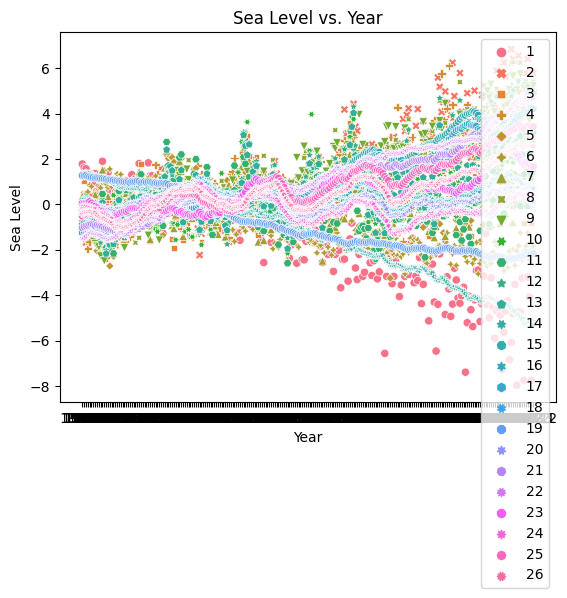

In [316]:
# create a scatterplot of the remaining columns
sb.scatterplot(data=season_sea_level, legend=True)

# set the plot title and axis labels
plt.title('Sea Level vs. Year')
plt.xlabel('Year')
plt.ylabel('Sea Level')

# display the plot
plt.show()

Number to Station Chart:

Unsmoothed Data
1 -     ALA Region
2 -     CEA Region
3 -     CWP Region
4 -     NEA Region
5 -     NEF Region
6 -     NPL Region
7 -     NWP Region
8 -     SEA Region
9 -     SPL Region
10 -    SWP Region
11 -    CAN Region
12 -    USA Region
13 -    USC Region

Smoothed Data
14 -     ALA Region
15 -     CEA Region
16 -     CWP Region
17 -     NEA Region
18 -     NEF Region
19 -     NPL Region
20 -     NWP Region
21 -     SEA Region
22 -     SPL Region
23 -    SWP Region
24 -    CAN Region
25 -    USA Region
26 -    USC Region

Separate the dataframe at the 13th data so that we have a smoothed dataset.

In [317]:
smoothed_season = season_sea_level.iloc[:, 13:]

Plot the smoothed data on a scatterplot.

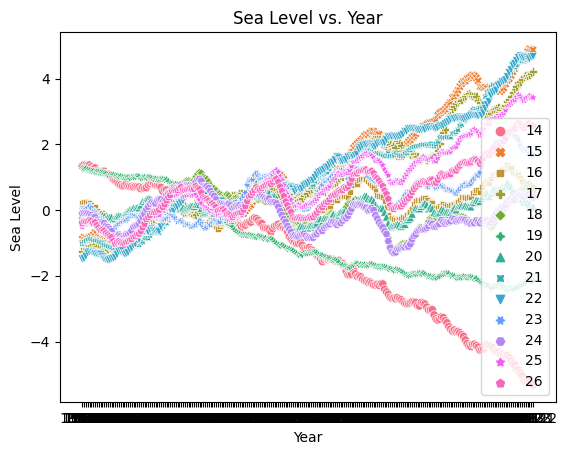

In [318]:
# create a scatterplot of the remaining columns
sb.scatterplot(data=smoothed_season, legend=True)

# set the plot title and axis labels
plt.title('Sea Level vs. Year')
plt.xlabel('Year')
plt.ylabel('Sea Level')

# display the plot
plt.show()

We're going to used the smoothed data as it is often the preferred form of data when performing calculations. It attempts to account for unpredictable factors and to reduce noise which would allow for more accurate results when utilizing a predictive model later on.

ALA - North Pacific
CEA - North Atlantic
CWP - Coastal Washington Ports
NEA - North East Americas (CA)
NEF - North East French Territory (CA)
NPL - Hudson Bay (CA)
NWP - North West Pacific (CA)
SEA - South East Americas
SPL - Southern Texas Gulf
SWP - South West Pacific
USA - ALA, CEA, CWP, SEA, SPL, and SWP
CAN - NEA, NEF, NPL, and NWP
USC - US/CAN

Because the data is combined and separated, we can split them and see what southern coasts look like as well as northern coasts.

In [319]:
smoothed_season_combined = smoothed_season.iloc[:, 10:]

In this figure, we're able to see all of the individual regions' data. While this will be useful later on for calculating individual data, the collective data is really important for one of my hypotheses I proposed.

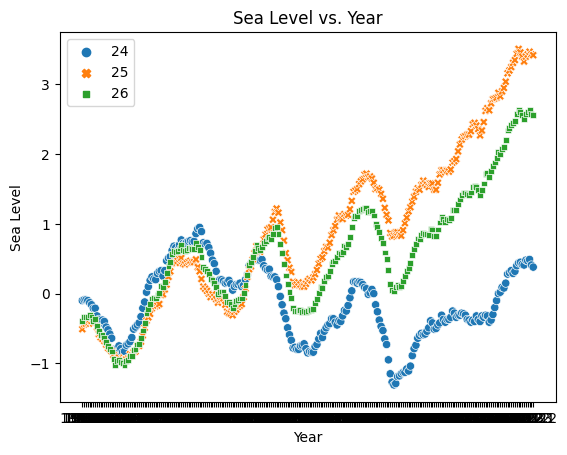

In [320]:
# create a scatterplot of the remaining columns
sb.scatterplot(data=smoothed_season_combined, legend=True)

# set the plot title and axis labels
plt.title('Sea Level vs. Year')
plt.xlabel('Year')
plt.ylabel('Sea Level')

# display the plot
plt.show()

It is important to reiterate that 24 is Canada, 25 is the US, and 26 is the shared US/Canadian waters. Here we can now officially note our first observations. My hypothesis appears to be true. The further south you go, the higher the sea level rises. It's also interesting to note that US and Canada have very similar patterns. At certain points, Canada has even had its sea level lowered. While I would need to perform other tests to say it for certain, if I had to guess a reason for this, it would because of the ice in the northern waters melting leading to less water displaced.

In [321]:
# Sepearate the data
canada = smoothed_season_combined.iloc[:, 0]
us = smoothed_season_combined.iloc[:, 1]
us_can = smoothed_season_combined.iloc[:, 2]

# Make the row names their own column
canada = canada.reset_index()
us = us.reset_index()
us_can = us_can.reset_index()

# Melt the dataframes so they're fixed
canada = pd.melt(canada, id_vars=['index'], value_vars=canada.iloc[:, 0:])
us = pd.melt(us, id_vars=['index'], value_vars=us.iloc[:, 0:])
us_can = pd.melt(us_can, id_vars=['index'], value_vars=us_can.iloc[:, 0:])

# Name the columns
canada.columns = ['Year', 'Station', 'Sea Level']
us.columns = ['Year', 'Station', 'Sea Level']
us_can.columns = ['Year', 'Station', 'Sea Level']

# Make the row names their own column
canada = canada.reset_index()
us = us.reset_index()
us_can = us_can.reset_index()

# Drop the Year and Station columns
canada = canada.drop(columns=['Year', 'Station'])
us = us.drop(columns=['Year', 'Station'])
us_can = us_can.drop(columns=['Year', 'Station'])


After prepping the data for regression testing, we now construct a regression plot for Canada, US/Canada, and the US coastal regions. This will provide us with a slope for each so that we're able to establish the relationship between sea level over time for each coastal region.

# Canada

Slope (By Quarter):  -0.001314284394639688
Slope (By Year):  -0.005257137578558752
Standard Error:  0.000453242936360608


Text(0, 0.5, 'Sea Level')

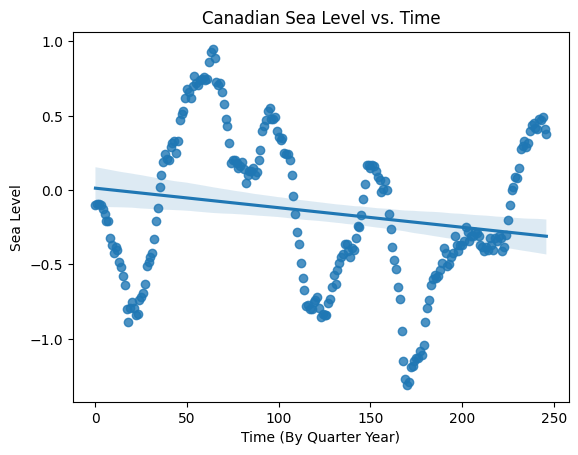

In [322]:
# Using a regression plot to plot the points as well as slope it
sb.regplot(y=canada['Sea Level'], x=canada['index'])

# Get the slope of the regression line and the standard error
can_slope, can_intercept, can_r_value, can_p_value, can_std_err = linregress(canada['index'], canada['Sea Level'])
print("Slope (By Quarter): ", can_slope)
print("Slope (By Year): ", can_slope * 4)
print("Standard Error: ", can_std_err)

# set the plot title and axis labels
plt.title('Canadian Sea Level vs. Time')
plt.xlabel('Time (By Quarter Year)')
plt.ylabel('Sea Level')

# US

Slope:  0.015177583400491183
Slope (By Year):  0.06071033360196473
Standard Error:  0.0003762160447428349


Text(0, 0.5, 'Sea Level')

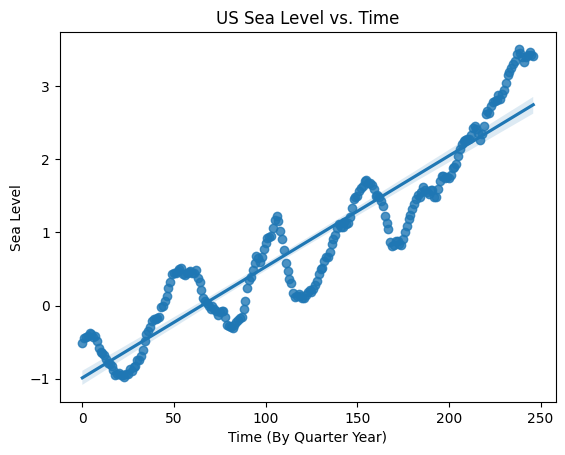

In [323]:
# Using a regression plot to plot the points as well as slope it
sb.regplot(x=us['index'], y=us['Sea Level'])

# Get the slope of the regression line and the standard error
us_slope, us_intercept, us_r_value, us_p_value, us_std_err = linregress(us['index'], us['Sea Level'])
print("Slope: ", us_slope)
print("Slope (By Year): ", us_slope * 4)
print("Standard Error: ", us_std_err)

# set the plot title and axis labels
plt.title('US Sea Level vs. Time')
plt.xlabel('Time (By Quarter Year)')
plt.ylabel('Sea Level')

# US/Canada

Slope:  0.010049898546523665
Slope (By Year):  0.04019959418609466
Standard Error:  0.00042781322338861965


Text(0, 0.5, 'Sea Level')

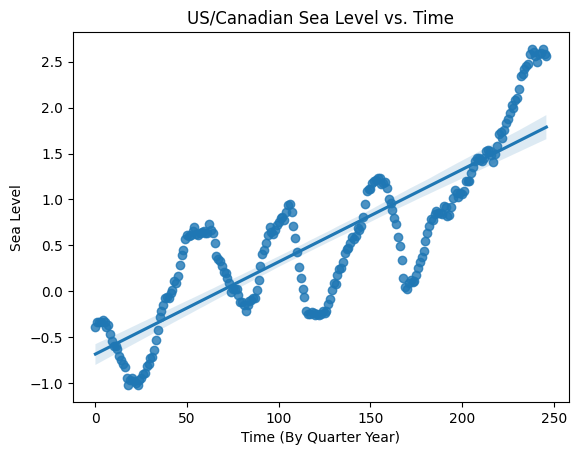

In [324]:
# Using a regression plot to plot the points as well as slope it
sb.regplot(x=us_can['index'], y=us_can['Sea Level'])

# Get the slope of the regression line and the standard error
us_can_slope, us_can_intercept, us_can_r_value, us_can_p_value, us_can_std_err = linregress(us_can['index'], us_can['Sea Level'])
print("Slope: ", us_can_slope)
print("Slope (By Year): ", us_can_slope * 4)
print("Standard Error: ", us_can_std_err)

# set the plot title and axis labels
plt.title('US/Canadian Sea Level vs. Time')
plt.xlabel('Time (By Quarter Year)')
plt.ylabel('Sea Level')

# Canada

MSE:  0.2106909182860978
r2:  0.04340643763868113


Text(0, 0.5, 'Sea Level')

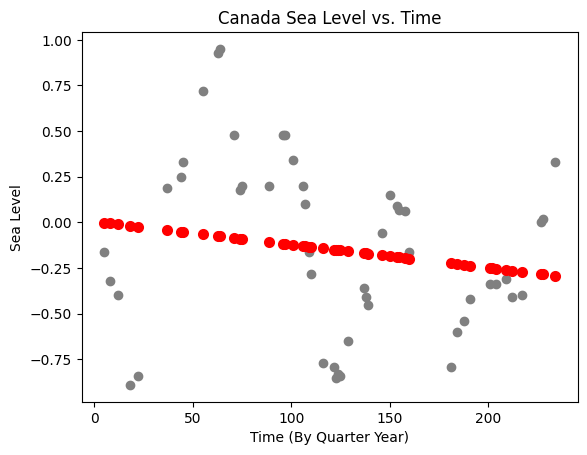

In [325]:
# Set X to the index column as it is an input variable
X = canada['index']
# Set y to the sea level column as it is the target variable you want to protect
y = canada['Sea Level']

# Get the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# Reshape the train data for the regression model
X_train = X_train.to_numpy().reshape(-1,1)
y_train = y_train.to_numpy().reshape(-1,1)

# Create a regression fit using the train data
regress = LinearRegression()
regress.fit(X_train, y_train)

# Reshape the test data for the y prediction operation
X_test = X_test.to_numpy().reshape(-1,1)

# Get the y predictions
y_pred = regress.predict(X_test)

# Calculate the Mean Squared Error and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("r2: ", r2)

# Plot the data
plt.scatter(X_test, y_test, color='gray')
plt.scatter(X_test, y_pred, color='red', linewidths=2)

# set the plot title and axis labels
plt.title('Canada Sea Level vs. Time')
plt.xlabel('Time (By Quarter Year)')
plt.ylabel('Sea Level')

# US

MSE:  0.14244925342574305
r2:  0.8559541481137842


Text(0, 0.5, 'Sea Level')

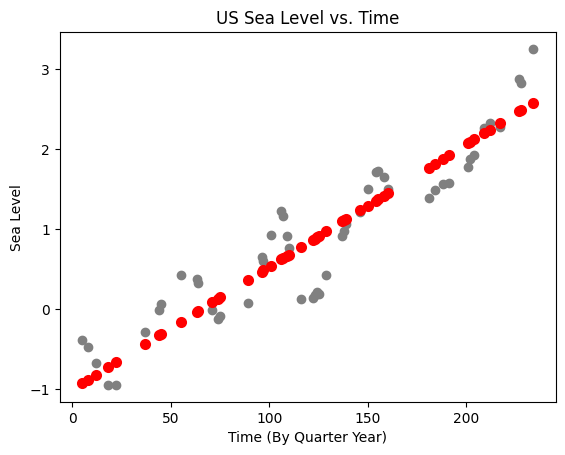

In [326]:
# Set X to the index column as it is an input variable
X = us['index']
# Set y to the sea level column as it is the target variable you want to protect
y = us['Sea Level']

# Get the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# Reshape the train data for the regression model
X_train = X_train.to_numpy().reshape(-1,1)
y_train = y_train.to_numpy().reshape(-1,1)

# Create a regression fit using the train data
regress = LinearRegression()
regress.fit(X_train, y_train)

# Reshape the test data for the y prediction operation
X_test = X_test.to_numpy().reshape(-1,1)

# Get the y predictions
y_pred = regress.predict(X_test)

# Calculate the Mean Squared Error and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("r2: ", r2)

# Plot the data
plt.scatter(X_test, y_test, color='gray')
plt.scatter(X_test, y_pred, color='red', linewidths=2)

# set the plot title and axis labels
plt.title('US Sea Level vs. Time')
plt.xlabel('Time (By Quarter Year)')
plt.ylabel('Sea Level')

# US/Canada

MSE:  0.18596563208317218
r2:  0.6571657884620421


Text(0, 0.5, 'Sea Level')

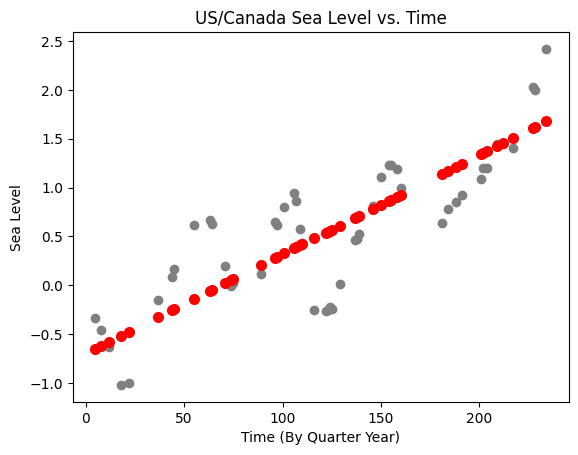

In [327]:
# Set X to the index column as it is an input variable
X = us_can['index']
# Set y to the sea level column as it is the target variable you want to protect
y = us_can['Sea Level']

# Get the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# Reshape the train data for the regression model
X_train = X_train.to_numpy().reshape(-1,1)
y_train = y_train.to_numpy().reshape(-1,1)

# Create a regression fit using the train data
regress = LinearRegression()
regress.fit(X_train, y_train)

# Reshape the test data for the y prediction operation
X_test = X_test.to_numpy().reshape(-1,1)

# Get the y predictions
y_pred = regress.predict(X_test)

# Calculate the Mean Squared Error and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("r2: ", r2)

# Plot the data
plt.scatter(X_test, y_test, color='gray')
plt.scatter(X_test, y_pred, color='red', linewidths=2)

# set the plot title and axis labels
plt.title('US/Canada Sea Level vs. Time')
plt.xlabel('Time (By Quarter Year)')
plt.ylabel('Sea Level')